In [1]:
import numpy as np
import pandas as pd
import scipy.stats

import bootcamp_utils
import altair as alt

In [2]:
df=pd.read_csv('data/grant_complete.csv',comment='#')
df.head()

,band,beak depth (mm),beak length (mm),species,year
0,20123,8.05,9.25,fortis,1973
1,20126,10.45,11.35,fortis,1973
2,20128,9.55,10.15,fortis,1973
3,20129,8.75,9.95,fortis,1973
4,20133,10.15,11.55,fortis,1973


In [3]:
df = df.loc[(df['year'].isin([1975,2012])) & (df['species'] == 'scandens'),
           ['year','beak depth (mm)']]

In [4]:
df['ecdf']=df.groupby('year').transform(bootcamp_utils.ecdf_y)

In [5]:
df.head()

,year,beak depth (mm),ecdf
401,1975,8.4,0.160920
402,1975,8.8,0.390805
403,1975,8.4,0.172414
404,1975,8.0,0.022989
405,1975,7.9,0.011494


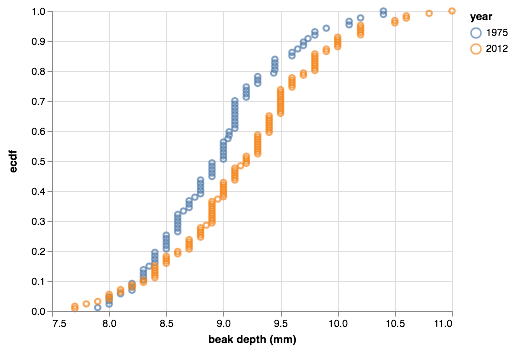

In [7]:
alt.Chart(df
    ).mark_point(
    ).encode(
        x=alt.X('beak depth (mm):Q', 
                scale=alt.Scale(zero=False)),
        y='ecdf:Q',
        color='year:N')

In [8]:
bd_1975 = df.loc[df['year']==1975, 'beak depth (mm)'].values
bd_2012 = df.loc[df['year']==2012, 'beak depth (mm)'].values

In [9]:
np.mean(bd_1975),np.mean(bd_2012)

(8.959999999999999, 9.188492063492063)

In [10]:
np.random.seed(42)
bs_sample = np.random.choice(bd_1975, replace=True,size=len(bd_1975))
bs_sample

array([ 9.7 ,  9.7 ,  9.8 ,  8.3 ,  8.9 ,  9.45,  8.35,  9.44,  9.44,
        8.7 ,  8.4 ,  9.1 ,  9.1 ,  8.8 ,  9.9 ,  9.1 ,  8.8 ,  8.6 ,
        8.1 ,  8.9 ,  8.4 ,  9.04,  8.  ,  9.1 , 10.2 ,  9.1 ,  8.3 ,
        8.1 ,  9.45,  9.7 ,  8.7 ,  8.7 ,  9.2 ,  8.7 ,  9.2 ,  8.2 ,
        8.6 ,  8.4 ,  9.2 ,  8.6 ,  8.9 , 10.4 ,  9.3 ,  9.  ,  8.  ,
        8.1 ,  9.  ,  8.9 ,  9.1 ,  8.8 ,  9.05,  8.1 ,  9.1 ,  9.1 ,
        8.5 ,  9.2 ,  8.5 ,  9.05,  8.65, 10.4 , 10.1 ,  8.  ,  8.8 ,
        8.9 ,  8.5 ,  8.  ,  8.5 ,  8.8 ,  9.  ,  9.1 ,  8.9 ,  8.3 ,
        8.7 ,  9.  ,  8.5 ,  9.7 ,  9.8 ,  9.05,  8.35,  8.7 ,  9.3 ,
        8.75,  9.45,  9.45,  9.1 ,  8.7 ,  8.5 ])

In [11]:
bs_sample.size,bd_1975.size

(87, 87)

In [24]:
x_bs,y_bs=bootcamp_utils.ecdf_vals(bs_sample)

df_bs = pd.DataFrame(data={'beak depth (mm)':x_bs,
                          'ecdf':y_bs,
                          'set':'bootstrap',
                          'year':1975})

df_orig = df.copy().loc[df['year']==1975,:]
df_orig['set']=1975

df_plot = pd.concat([df_bs,df_orig],ignore_index=True, sort=True)

In [ ]:
df.concat?

In [39]:
df_bs.head()

,beak depth (mm),ecdf,set,year
0,8.0,0.011494,bootstrap,1975
1,8.0,0.022989,bootstrap,1975
2,8.0,0.034483,bootstrap,1975
3,8.0,0.045977,bootstrap,1975
4,8.1,0.057471,bootstrap,1975


In [40]:
df_orig.head()

,year,beak depth (mm),ecdf,set
401,1975,8.4,0.160920,1975
402,1975,8.8,0.390805,1975
403,1975,8.4,0.172414,1975
404,1975,8.0,0.022989,1975
405,1975,7.9,0.011494,1975


In [41]:
df_plot.head()

,beak depth (mm),ecdf,set,year
0,8.0,0.011494,bootstrap,1975
1,8.0,0.022989,bootstrap,1975
2,8.0,0.034483,bootstrap,1975
3,8.0,0.045977,bootstrap,1975
4,8.1,0.057471,bootstrap,1975


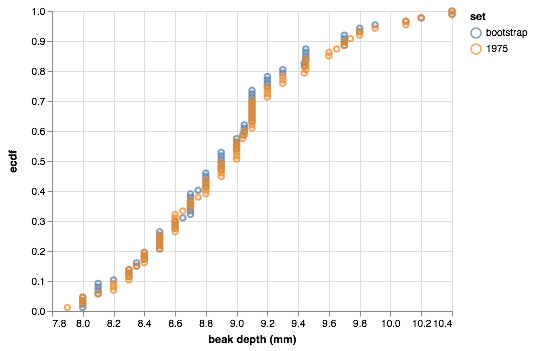

In [25]:
alt.Chart(df_plot
    ).mark_point(
    ).encode(
        x=alt.X('beak depth (mm):Q',scale=alt.Scale(zero=False)),
        y='ecdf:Q',
color=alt.Color('set:N'))

In [26]:
np.mean(bs_sample),np.mean(bd_1975)

(8.92609195402299, 8.959999999999999)

In [27]:
n_reps = 100000

bs_reps_1975 = np.empty(n_reps)

for i in range(n_reps):
    bs_sample = np.random.choice(bd_1975, size=len(bd_1975))
    bs_reps_1975[i] = np.mean(bs_sample)   # mean/ std/... also works

In [28]:
bs_reps_1975

array([8.95954023, 8.95574713, 8.85390805, ..., 9.04862069, 9.02229885,
       9.00954023])

In [35]:
x,y = bootcamp_utils.ecdf_vals(bs_reps_1975)

df_ecdf = pd.DataFrame(data={'mean beak depth (mm)':x[::1000],
                            'ecdf':y[::1000]})

# ecdf of the mean

In [31]:
df_ecdf

,mean beak depth (mm),edcf
0,8.711149,0.00001
1,8.821839,0.01001
2,8.837356,0.02001
3,8.847586,0.03001
4,8.855057,0.04001
5,8.861379,0.05001
6,8.866667,0.06001
7,8.871149,0.07001
8,8.875402,0.08001
9,8.879195,0.09001


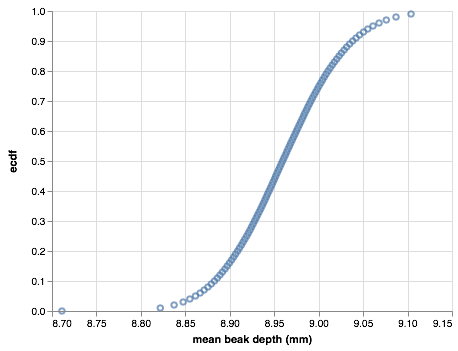

In [36]:
alt.Chart(df_ecdf
         ).mark_point(
        ).encode(
        x=alt.X('mean beak depth (mm):Q', scale = alt.Scale(zero=False)),
y='ecdf:Q')

In [37]:
np.mean(bs_reps_1975), np.percentile(bs_reps_1975,[2.5,97.5])

(8.96006713678161, array([8.84298851, 9.08103448]))

In [38]:
np.mean(bd_1975)+1.96*np.std(bd_1975)/np.sqrt(len(bd_1975))

9.07837473262184